In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop('Name', axis = 1)

In [5]:
df = df.drop('Ticket', axis = 1)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Embarked'] = df['Embarked'].fillna('X')

In [ ]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,NaN,S
885,886,0,3,female,39.0,0,5,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S


In [9]:
df['Cabin'] = df['Cabin'].fillna('X000')

In [10]:
df[df['Cabin'].str.contains(' ')]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
27,28,0,1,male,19.00,3,2,263.0000,C23 C25 C27,S
75,76,0,3,male,25.00,0,0,7.6500,F G73,S
88,89,1,1,female,23.00,3,2,263.0000,C23 C25 C27,S
97,98,1,1,male,23.00,0,1,63.3583,D10 D12,C
118,119,0,1,male,24.00,0,1,247.5208,B58 B60,C
128,129,1,3,female,NaN,1,1,22.3583,F E69,C
297,298,0,1,female,2.00,1,2,151.5500,C22 C26,S
299,300,1,1,female,50.00,0,1,247.5208,B58 B60,C
305,306,1,1,male,0.92,1,2,151.5500,C22 C26,S
311,312,1,1,female,18.00,2,2,262.3750,B57 B59 B63 B66,C


In [11]:
multi_cabin_rows = df['Cabin'].str.contains(' ', na=False)

In [12]:
df.loc[multi_cabin_rows, 'Cabin'] = df.loc[multi_cabin_rows, 'Cabin'].str.split()
df_exploded = df.explode('Cabin', ignore_index=True)

In [13]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,X000,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,X000,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,X000,S


In [14]:
print(df_exploded)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
1              2         1       1  female  38.0      1      0  71.2833   C85   
2              3         1       3  female  26.0      0      0   7.9250  X000   
3              4         1       1  female  35.0      1      0  53.1000  C123   
4              5         0       3    male  35.0      0      0   8.0500  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
920          887         0       2    male  27.0      0      0  13.0000  X000   
921          888         1       1  female  19.0      0      0  30.0000   B42   
922          889         0       3  female   NaN      1      2  23.4500  X000   
923          890         1       1    male  26.0      0      0  30.0000  C148   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked  
0          S

In [15]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]$')]
print(single_letter_cabins)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
77            76         0       3    male  25.0      0      0   7.6500     F   
135          129         1       3  female   NaN      1      1  22.3583     F   
300          293         0       2    male  36.0      0      0  12.8750     D   
341          328         1       2  female  36.0      0      0  13.0000     D   
353          340         0       1    male  45.0      0      0  35.5000     T   
493          474         1       2  female  23.0      0      0  13.7917     D   
722          700         0       3    male  42.0      0      0   7.6500     F   
740          716         0       3    male  19.0      0      0   7.6500     F   

    Embarked  
77         S  
135        C  
300        C  
341        S  
353        S  
493        C  
722        S  
740        S  


In [16]:
df_exploded[['Deck', 'Number']] = df_exploded['Cabin'].str.extract(r'([A-Za-z])(\d+)')
print(df_exploded)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
1              2         1       1  female  38.0      1      0  71.2833   C85   
2              3         1       3  female  26.0      0      0   7.9250  X000   
3              4         1       1  female  35.0      1      0  53.1000  C123   
4              5         0       3    male  35.0      0      0   8.0500  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
920          887         0       2    male  27.0      0      0  13.0000  X000   
921          888         1       1  female  19.0      0      0  30.0000   B42   
922          889         0       3  female   NaN      1      2  23.4500  X000   
923          890         1       1    male  26.0      0      0  30.0000  C148   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked Deck Number  


In [17]:
df_exploded[df_exploded['Deck'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
77,76,0,3,male,25.0,0,0,7.6500,F,S,NaN,NaN
135,129,1,3,female,NaN,1,1,22.3583,F,C,NaN,NaN
300,293,0,2,male,36.0,0,0,12.8750,D,C,NaN,NaN
341,328,1,2,female,36.0,0,0,13.0000,D,S,NaN,NaN
353,340,0,1,male,45.0,0,0,35.5000,T,S,NaN,NaN
493,474,1,2,female,23.0,0,0,13.7917,D,C,NaN,NaN
722,700,0,3,male,42.0,0,0,7.6500,F,S,NaN,NaN
740,716,0,3,male,19.0,0,0,7.6500,F,S,NaN,NaN


In [18]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]000$')]
print(single_letter_cabins)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
2              3         1       3  female  26.0      0      0   7.9250  X000   
4              5         0       3    male  35.0      0      0   8.0500  X000   
5              6         0       3    male   NaN      0      0   8.4583  X000   
7              8         0       3    male   2.0      3      1  21.0750  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
918          885         0       3    male  25.0      0      0   7.0500  X000   
919          886         0       3  female  39.0      0      5  29.1250  X000   
920          887         0       2    male  27.0      0      0  13.0000  X000   
922          889         0       3  female   NaN      1      2  23.4500  X000   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked Deck Number  


In [19]:
df_exploded.loc[single_letter_cabins.index, 'Deck'] = single_letter_cabins['Cabin'].str[0]

In [20]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]$')]
print(single_letter_cabins[['Cabin', 'Deck']])

    Cabin Deck
77      F  NaN
135     F  NaN
300     D  NaN
341     D  NaN
353     T  NaN
493     D  NaN
722     F  NaN
740     F  NaN


In [21]:
df_exploded.loc[single_letter_cabins.index, 'Deck'] = single_letter_cabins['Cabin'].str[0]

In [22]:
remaining_nan_deck = df_exploded[df_exploded['Deck'].isnull()]
print(remaining_nan_deck[['Cabin', 'Deck']])

Empty DataFrame
Columns: [Cabin, Deck]
Index: []


In [23]:
df_exploded[df_exploded['Deck'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number


In [24]:
df_exploded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Deck             0
Number           8
dtype: int64

In [25]:
df_exploded[df_exploded['Number'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
77,76,0,3,male,25.0,0,0,7.6500,F,S,F,NaN
135,129,1,3,female,NaN,1,1,22.3583,F,C,F,NaN
300,293,0,2,male,36.0,0,0,12.8750,D,C,D,NaN
341,328,1,2,female,36.0,0,0,13.0000,D,S,D,NaN
353,340,0,1,male,45.0,0,0,35.5000,T,S,T,NaN
493,474,1,2,female,23.0,0,0,13.7917,D,C,D,NaN
722,700,0,3,male,42.0,0,0,7.6500,F,S,F,NaN
740,716,0,3,male,19.0,0,0,7.6500,F,S,F,NaN


In [26]:
df_exploded['Number'] = pd.to_numeric(df_exploded['Number'], errors='coerce')

In [27]:
median_values = df_exploded.groupby('Deck')['Number'].median()

In [28]:
df_exploded['Number'] = df_exploded.apply(
    lambda row: median_values[row['Deck']] if pd.isnull(row['Number']) else row['Number'],
    axis=1)

In [29]:
remaining_nan_numbers = df_exploded[df_exploded['Number'].isnull()]
print(remaining_nan_numbers[['Cabin', 'Deck', 'Number']])

    Cabin Deck  Number
353     T    T     NaN


In [30]:
df_exploded['Number'] = df_exploded['Number'].fillna(0)

In [31]:
df_exploded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Deck             0
Number           0
dtype: int64

In [32]:
df_exploded[df_exploded['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
5,6,0,3,male,NaN,0,0,8.4583,X000,Q,X,0.0
17,18,1,2,male,NaN,0,0,13.0000,X000,S,X,0.0
19,20,1,3,female,NaN,0,0,7.2250,X000,C,X,0.0
26,27,0,3,male,NaN,0,0,7.2250,X000,C,X,0.0
30,29,1,3,female,NaN,0,0,7.8792,X000,Q,X,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,860,0,3,male,NaN,0,0,7.2292,X000,C,X,0.0
895,864,0,3,female,NaN,8,2,69.5500,X000,S,X,0.0
900,869,0,3,male,NaN,0,0,9.5000,X000,S,X,0.0
912,879,0,3,male,NaN,0,0,7.8958,X000,S,X,0.0


In [33]:
age_medians = df_exploded.groupby('Pclass')['Age'].median()

In [34]:
df_exploded['Age'] = df_exploded.apply(lambda row: age_medians[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [35]:
df_exploded.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Deck           0
Number         0
dtype: int64

In [36]:
df_exploded = pd.get_dummies(df_exploded, columns=['Sex', 'Embarked', 'Deck'])


In [37]:
df_exploded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Number,Sex_female,...,Embarked_X,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X
0,1,0,3,22.0,1,0,7.2500,X000,0.0,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,C85,85.0,True,...,False,False,False,True,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,X000,0.0,True,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,C123,123.0,True,...,False,False,False,True,False,False,False,False,False,False
4,5,0,3,35.0,0,0,8.0500,X000,0.0,False,...,False,False,False,False,False,False,False,False,False,True


In [38]:
df_exploded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Number         float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Embarked_X        bool
Deck_A            bool
Deck_B            bool
Deck_C            bool
Deck_D            bool
Deck_E            bool
Deck_F            bool
Deck_G            bool
Deck_T            bool
Deck_X            bool
dtype: object

In [39]:
df_exploded=df_exploded.drop('Cabin', axis=1)

In [40]:
df_exploded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Number         float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Embarked_X        bool
Deck_A            bool
Deck_B            bool
Deck_C            bool
Deck_D            bool
Deck_E            bool
Deck_F            bool
Deck_G            bool
Deck_T            bool
Deck_X            bool
dtype: object

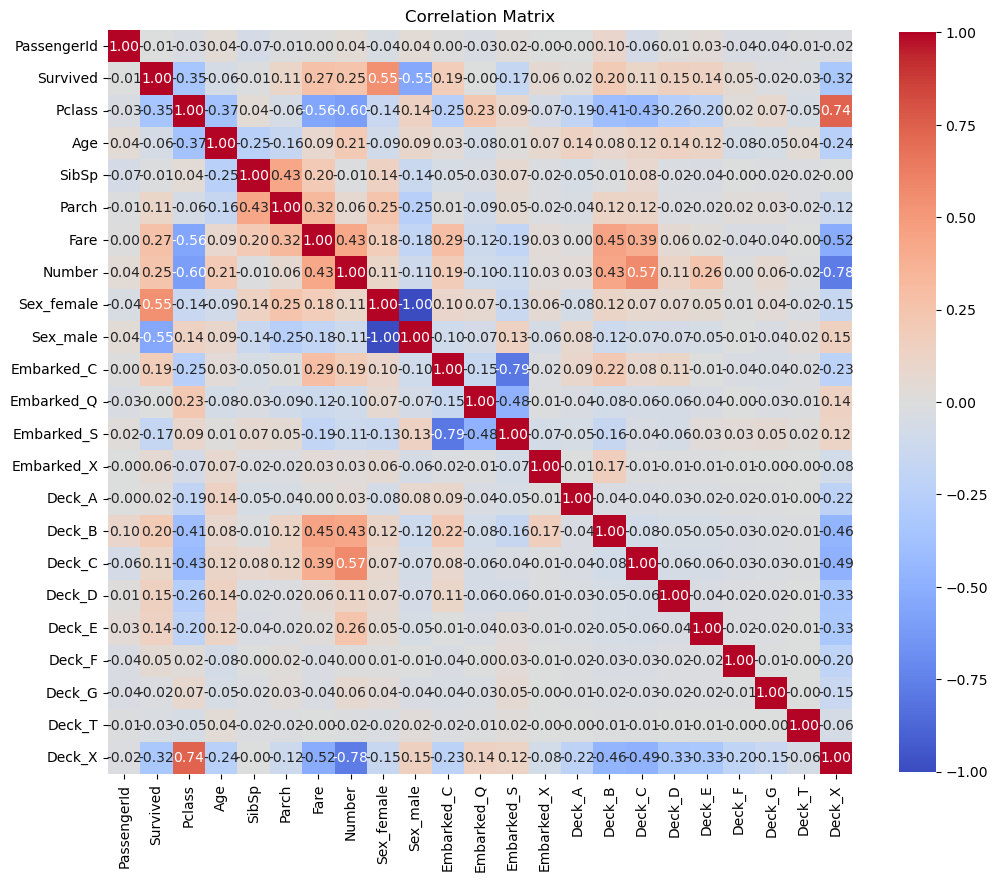

In [41]:
correlation_matrix=df_exploded.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

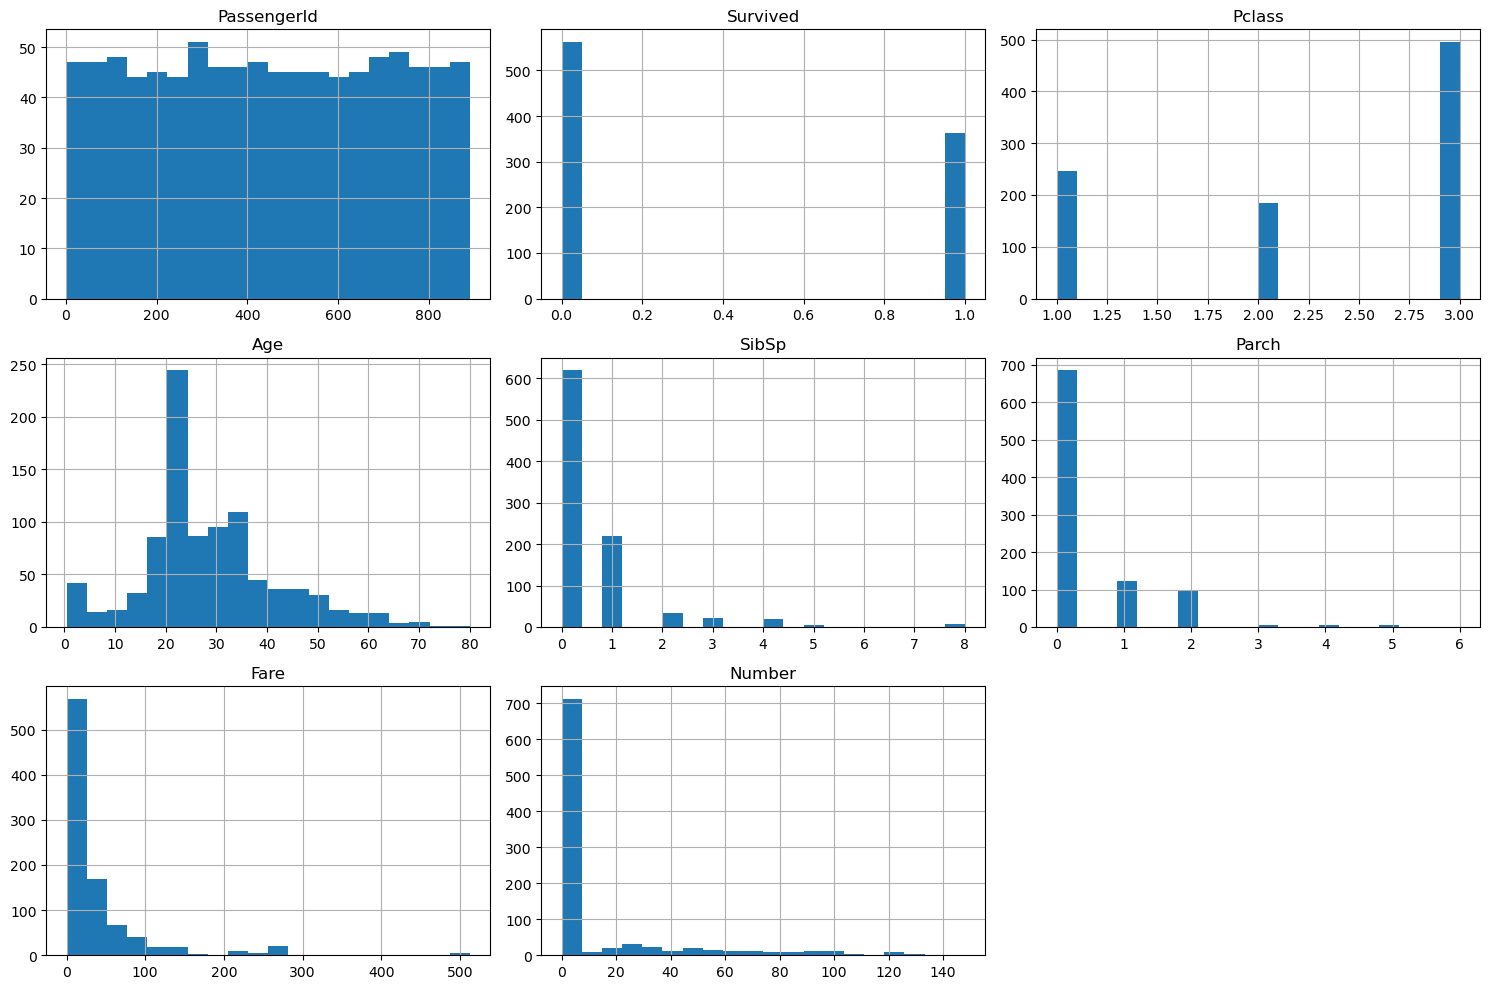

In [42]:
df_exploded.hist(bins=20, figsize=(15, 10))  # Adjust 'bins' and 'figsize' as desired
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

array([[<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Number'}>]], dtype=object)

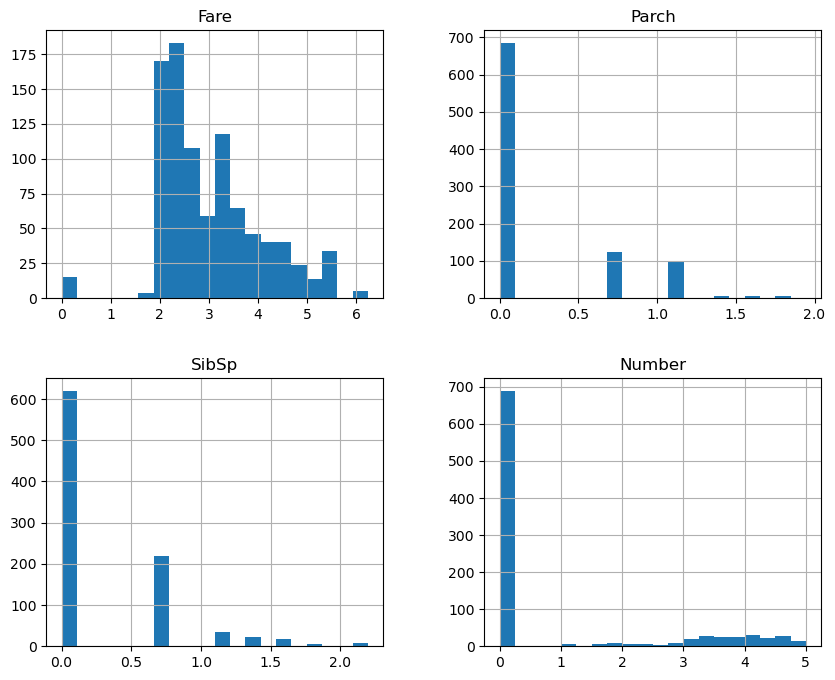

In [43]:
columns_to_log_transform = ['Fare', 'Parch', 'SibSp', 'Number']
for col in columns_to_log_transform:
    if col in df_exploded.columns:
        df_exploded[col] = np.log1p(df_exploded[col])


df_exploded[columns_to_log_transform].hist(bins=20, figsize=(10, 8))

In [44]:
df_exploded['FamilySize'] = df_exploded['SibSp'] + df_exploded['Parch'] + 1

In [45]:
df_exploded['age_group'] = pd.cut(df_exploded['Age'], 
                                   bins=[0, 18, 30, 45, 60, 100], 
                                   labels=['0-18', '19-30', '31-45', '46-60', '61+'])

In [46]:
df_exploded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Number,Sex_female,Sex_male,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,FamilySize,age_group
0,1,0,3,22.0,0.693147,0.0,2.110213,0.000000,False,True,...,False,False,False,False,False,False,False,True,1.693147,19-30
1,2,1,1,38.0,0.693147,0.0,4.280593,4.454347,True,False,...,False,True,False,False,False,False,False,False,1.693147,31-45
2,3,1,3,26.0,0.000000,0.0,2.188856,0.000000,True,False,...,False,False,False,False,False,False,False,True,1.000000,19-30
3,4,1,1,35.0,0.693147,0.0,3.990834,4.820282,True,False,...,False,True,False,False,False,False,False,False,1.693147,31-45
4,5,0,3,35.0,0.000000,0.0,2.202765,0.000000,False,True,...,False,False,False,False,False,False,False,True,1.000000,31-45


In [47]:
df_exploded = pd.get_dummies(df_exploded, columns=['age_group'])

In [48]:
df_exploded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Number,Sex_female,Sex_male,...,Deck_F,Deck_G,Deck_T,Deck_X,FamilySize,age_group_0-18,age_group_19-30,age_group_31-45,age_group_46-60,age_group_61+
0,1,0,3,22.0,0.693147,0.0,2.110213,0.000000,False,True,...,False,False,False,True,1.693147,False,True,False,False,False
1,2,1,1,38.0,0.693147,0.0,4.280593,4.454347,True,False,...,False,False,False,False,1.693147,False,False,True,False,False
2,3,1,3,26.0,0.000000,0.0,2.188856,0.000000,True,False,...,False,False,False,True,1.000000,False,True,False,False,False
3,4,1,1,35.0,0.693147,0.0,3.990834,4.820282,True,False,...,False,False,False,False,1.693147,False,False,True,False,False
4,5,0,3,35.0,0.000000,0.0,2.202765,0.000000,False,True,...,False,False,False,True,1.000000,False,False,True,False,False


In [49]:
df_exploded['FarePerPerson'] = df_exploded['Fare'] / df_exploded['FamilySize']

In [50]:
df_exploded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Number,Sex_female,Sex_male,...,Deck_G,Deck_T,Deck_X,FamilySize,age_group_0-18,age_group_19-30,age_group_31-45,age_group_46-60,age_group_61+,FarePerPerson
0,1,0,3,22.0,0.693147,0.0,2.110213,0.000000,False,True,...,False,False,True,1.693147,False,True,False,False,False,1.246326
1,2,1,1,38.0,0.693147,0.0,4.280593,4.454347,True,False,...,False,False,False,1.693147,False,False,True,False,False,2.528187
2,3,1,3,26.0,0.000000,0.0,2.188856,0.000000,True,False,...,False,False,True,1.000000,False,True,False,False,False,2.188856
3,4,1,1,35.0,0.693147,0.0,3.990834,4.820282,True,False,...,False,False,False,1.693147,False,False,True,False,False,2.357051
4,5,0,3,35.0,0.000000,0.0,2.202765,0.000000,False,True,...,False,False,True,1.000000,False,False,True,False,False,2.202765


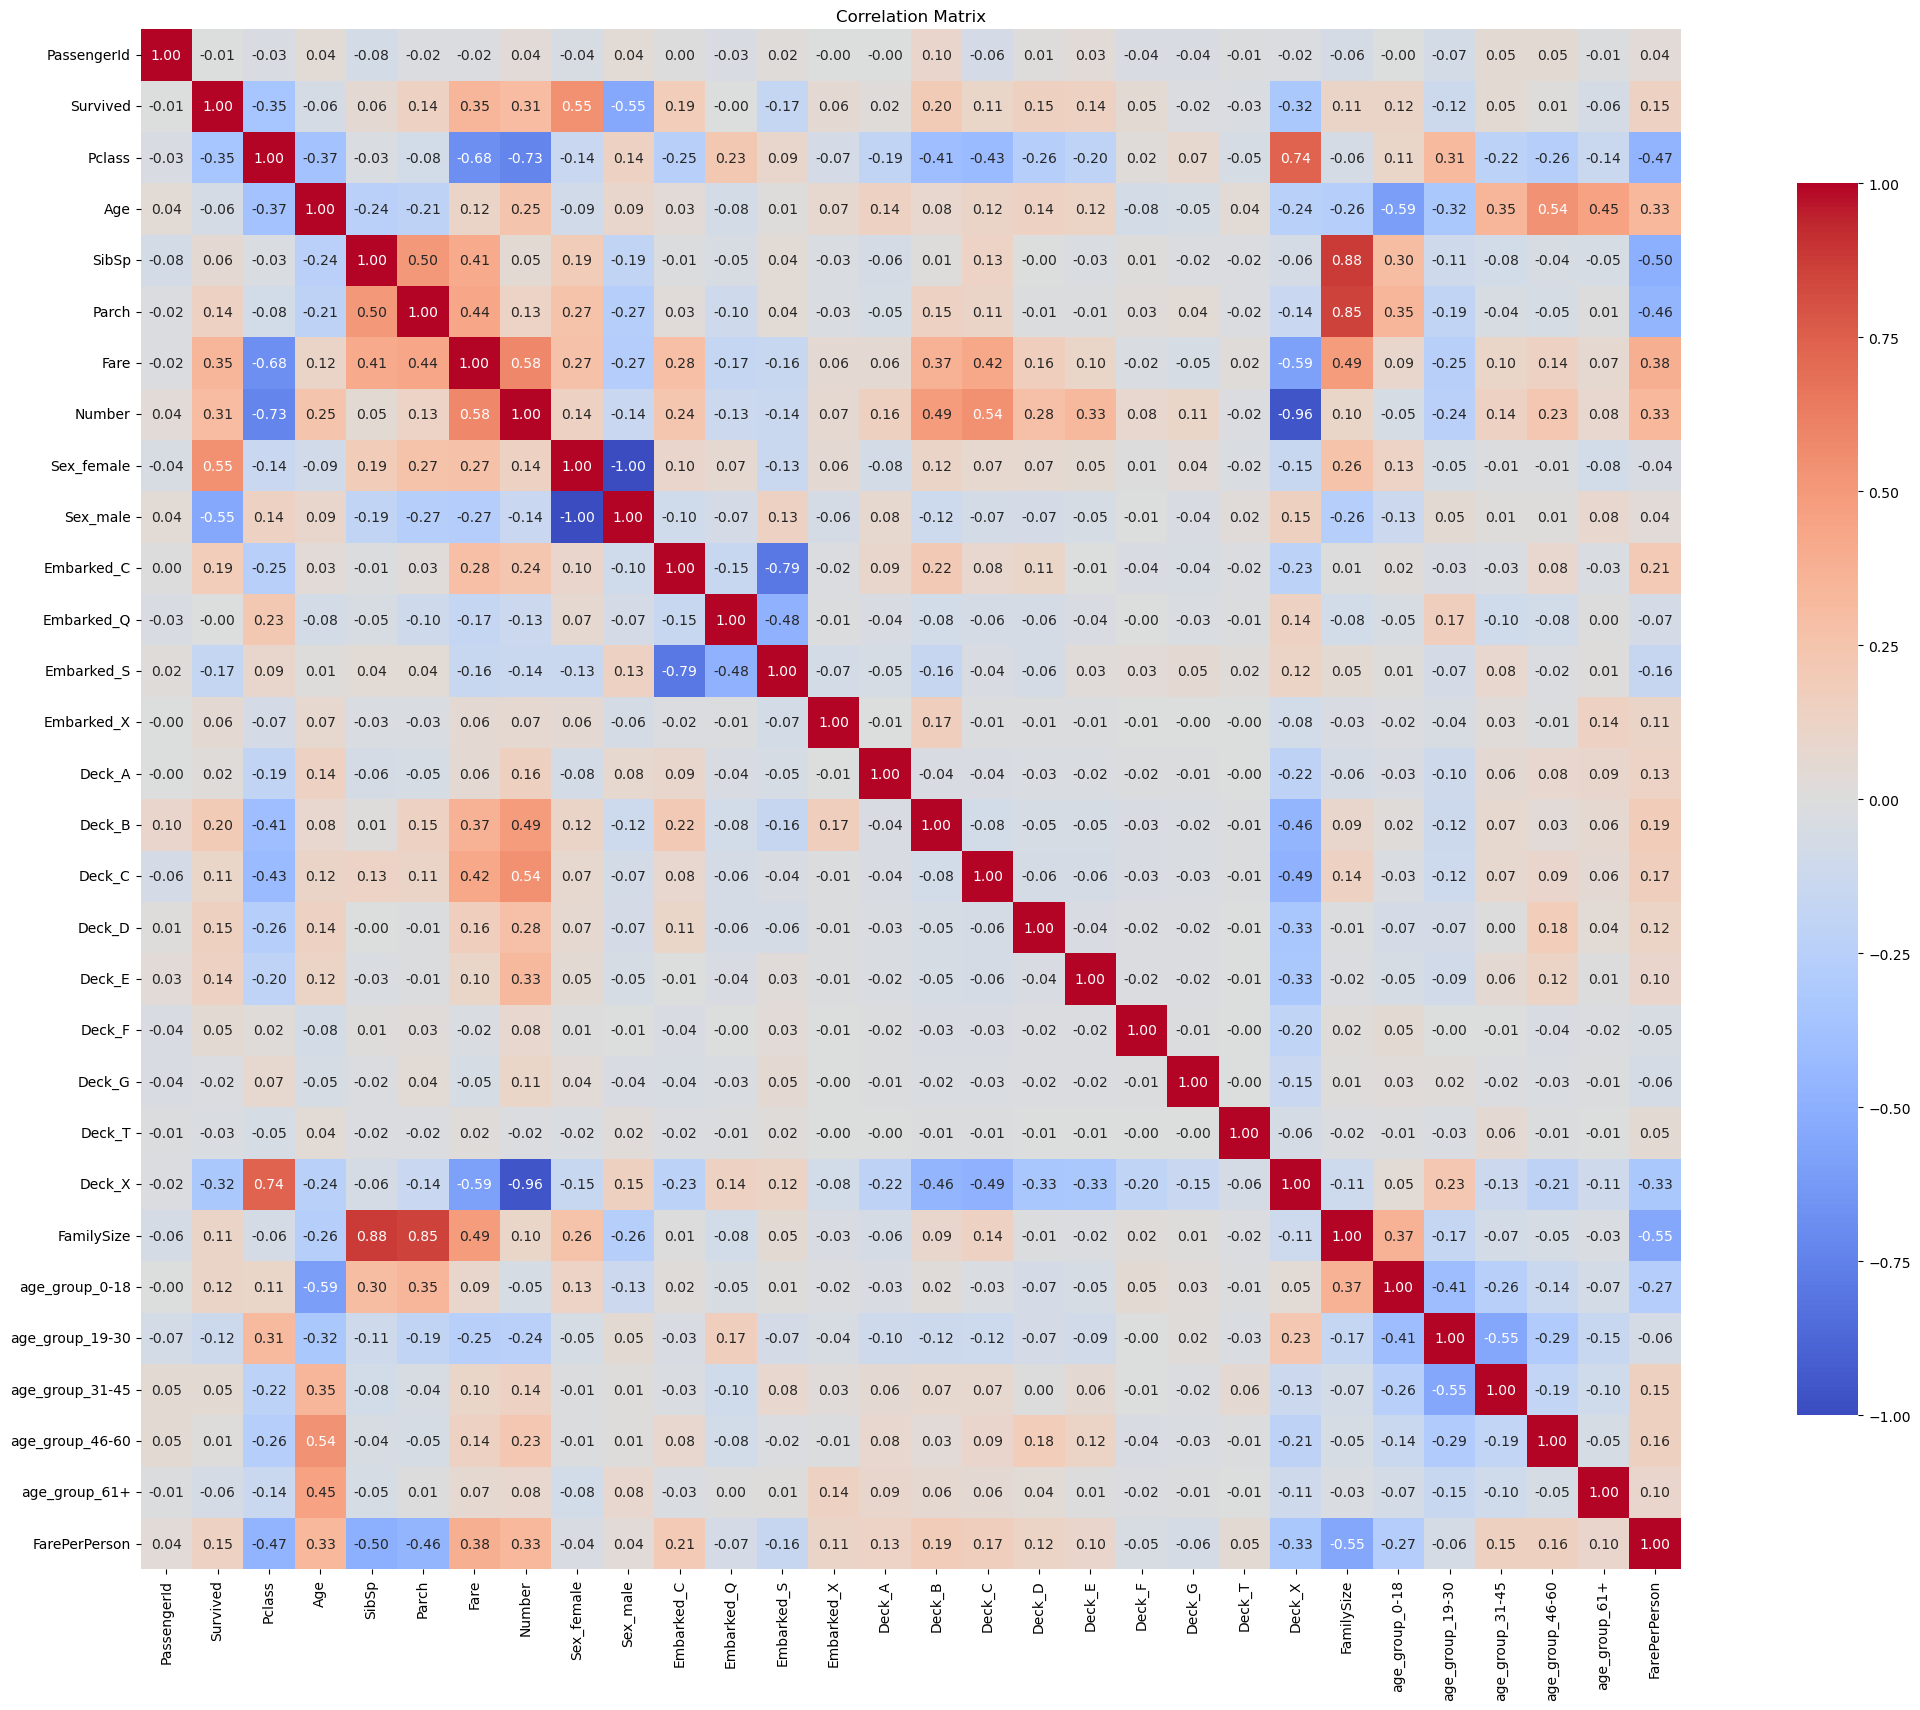

In [51]:
correlation_matrix=df_exploded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [52]:
df_exploded[['Embarked_C', 'Embarked_Q','Embarked_S','Embarked_X', 'Sex_female', 'Sex_male', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_X', 'age_group_0-18','age_group_19-30', 'age_group_31-45', 'age_group_46-60', 'age_group_61+']] = df_exploded[['Embarked_C', 'Embarked_Q','Embarked_S','Embarked_X', 'Sex_female', 'Sex_male', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_X', 'age_group_0-18','age_group_19-30', 'age_group_31-45', 'age_group_46-60', 'age_group_61+']].astype(int)


In [53]:
df_exploded.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Age                float64
SibSp              float64
Parch              float64
Fare               float64
Number             float64
Sex_female           int32
Sex_male             int32
Embarked_C           int32
Embarked_Q           int32
Embarked_S           int32
Embarked_X           int32
Deck_A               int32
Deck_B               int32
Deck_C               int32
Deck_D               int32
Deck_E               int32
Deck_F               int32
Deck_G               int32
Deck_T               int32
Deck_X               int32
FamilySize         float64
age_group_0-18       int32
age_group_19-30      int32
age_group_31-45      int32
age_group_46-60      int32
age_group_61+        int32
FarePerPerson      float64
dtype: object

In [54]:
def min_max_scaling(df_exploded):
  for column in df_exploded.columns:
    df_exploded[column] = (df_exploded[column] - df_exploded[column].min()) / (df_exploded[column].max() - df_exploded[column].min())
  return df_exploded 

In [55]:
df_sc= min_max_scaling(df_exploded)
print(df_sc)

     PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0       0.000000       0.0     1.0  0.271174  0.315465  0.000000  0.338125   
1       0.001124       1.0     0.0  0.472229  0.315465  0.000000  0.685892   
2       0.002247       1.0     1.0  0.321438  0.000000  0.000000  0.350727   
3       0.003371       1.0     0.0  0.434531  0.315465  0.000000  0.639463   
4       0.004494       0.0     1.0  0.434531  0.000000  0.000000  0.352955   
..           ...       ...     ...       ...       ...       ...       ...   
920     0.995506       0.0     0.5  0.334004  0.000000  0.000000  0.422864   
921     0.996629       1.0     0.0  0.233476  0.000000  0.000000  0.550238   
922     0.997753       0.0     1.0  0.296306  0.315465  0.564575  0.512205   
923     0.998876       1.0     0.0  0.321438  0.000000  0.000000  0.550238   
924     1.000000       0.0     1.0  0.396833  0.000000  0.000000  0.347554   

       Number  Sex_female  Sex_male  ...  Deck_G  Deck_T  Deck_

In [56]:
corr_matrix = df_sc.corr().abs() 

threshold = 0.8

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

correlated_pairs = [(column, row) for column in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, column] > threshold]

print("Pairs of highly correlated features:")
for pair in correlated_pairs:
    print(pair)

Pairs of highly correlated features:
('Sex_male', 'Sex_female')
('Deck_X', 'Number')
('FamilySize', 'SibSp')
('FamilySize', 'Parch')


In [57]:
df_sc = df_sc.drop(columns=['Number', 'FamilySize'], axis=1)

In [58]:
df_sc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,...,Deck_F,Deck_G,Deck_T,Deck_X,age_group_0-18,age_group_19-30,age_group_31-45,age_group_46-60,age_group_61+,FarePerPerson
0,0.000000,0.0,1.0,0.271174,0.315465,0.000000,0.338125,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.199702
1,0.001124,1.0,0.0,0.472229,0.315465,0.000000,0.685892,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.405099
2,0.002247,1.0,1.0,0.321438,0.000000,0.000000,0.350727,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.350727
3,0.003371,1.0,0.0,0.434531,0.315465,0.000000,0.639463,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.377677
4,0.004494,0.0,1.0,0.434531,0.000000,0.000000,0.352955,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.352955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0.995506,0.0,0.5,0.334004,0.000000,0.000000,0.422864,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.422864
921,0.996629,1.0,0.0,0.233476,0.000000,0.000000,0.550238,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.550238
922,0.997753,0.0,1.0,0.296306,0.315465,0.564575,0.512205,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.183470
923,0.998876,1.0,0.0,0.321438,0.000000,0.000000,0.550238,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.550238


In [59]:
df_sc = df_sc.drop(columns=['PassengerId'], axis=1)

In [60]:
df_sc.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_F,Deck_G,Deck_T,Deck_X,age_group_0-18,age_group_19-30,age_group_31-45,age_group_46-60,age_group_61+,FarePerPerson
0,0.0,1.0,0.271174,0.315465,0.0,0.338125,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.199702
1,1.0,0.0,0.472229,0.315465,0.0,0.685892,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.405099
2,1.0,1.0,0.321438,0.000000,0.0,0.350727,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.350727
3,1.0,0.0,0.434531,0.315465,0.0,0.639463,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.377677
4,0.0,1.0,0.434531,0.000000,0.0,0.352955,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.352955


In [61]:
df_sc=df_sc.sample(frac=1,random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df_sc))
x=df_sc.drop(columns=['Survived'],axis=1)
y=df_sc[['Survived']]
y_train=y[:split_idx]
y_test=y[split_idx:]
x_train=x[:split_idx]
x_test=x[split_idx:]

In [62]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

Iteration 0: Loss = 0.6931471785599452
Iteration 100: Loss = 0.5082203670772203
Iteration 200: Loss = 0.48602841369129657
Iteration 300: Loss = 0.48016184727696354
Iteration 400: Loss = 0.4778259675460096
Iteration 500: Loss = 0.47658914219782955
Iteration 600: Loss = 0.4758174760640831
Iteration 700: Loss = 0.47529328593786285
Iteration 800: Loss = 0.47492059843397233
Iteration 900: Loss = 0.47464797821380983
Training Accuracy: 0.7891891891891892
Testing Accuracy: 0.8054054054054054
Precision:  0.7702702702702703
Recall:  0.75
F1 score:  0.7600000000000001


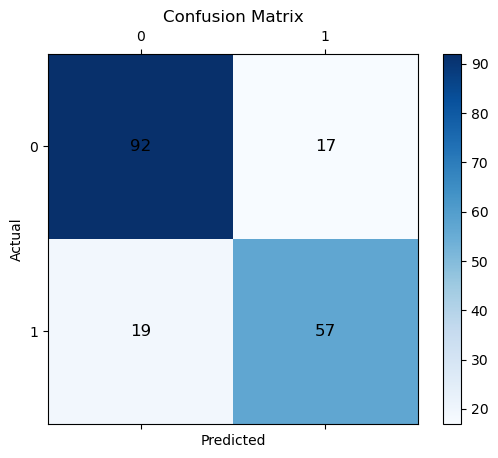

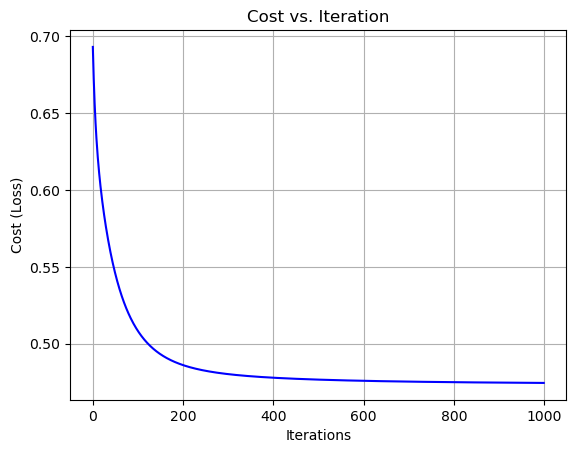

In [63]:
class LogisticRegression:
    def __init__(self, learning_rate=0.09, n_iters=1000, lambda_=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_  
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        loss = -np.mean(y1 + y2)

        
        loss += (self.lambda_ / 2) * np.sum(self.weights ** 2)

        return loss

    def report_loss(self, iteration):
        
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Loss = {self.losses[-1]}")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            
            loss = self.compute_loss(y, y_predicted)
            self.losses.append(loss)

            
            self.report_loss(i)

            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            
            dw += self.lambda_ * self.weights  

            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def plot_cost_vs_iteration(self):
        plt.plot(range(self.n_iters), self.losses, color='blue')
        plt.title('Cost vs. Iteration')
        plt.xlabel('Iterations')
        plt.ylabel('Cost (Loss)')
        plt.grid()
        plt.show()

    def precision(self, y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        precision = tp / (tp + fp)
        return precision  

    def recall(self, y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        recall = tp / (tp + fn)
        return recall  
    
    def f1_score(self, y_true, y_pred):
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        f1 = 2 * (precision * recall) / (precision + recall)
        return f1
    
    def confusion_matrix(self, y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        return np.array([[tn, fp], [fn, tp]])

    def plot_confusion_matrix(self, cm):
        fig, ax = plt.subplots()
        cax = ax.matshow(cm, cmap='Blues')
        plt.colorbar(cax)

        for (i, j), val in np.ndenumerate(cm):
            ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=12)

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks([0, 1], ['0', '1'])
        plt.yticks([0, 1], ['0', '1'])
        plt.title('Confusion Matrix')
        plt.show()



df_sc = df_sc.sample(frac=1, random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df_sc))
x = df_sc.drop(columns=['Survived'], axis=1)
y = df_sc[['Survived']]  
y_train = y[:split_idx].values.ravel()  
y_test = y[split_idx:].values.ravel()  
x_train = x[:split_idx].to_numpy()
x_test = x[split_idx:].to_numpy()


model = LogisticRegression(lambda_=0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)
train_acc = accuracy(y_train, y_train_pred) 
print("Training Accuracy:", train_acc)
acc = accuracy(y_test, y_pred)
print("Testing Accuracy:", acc)
prec = model.precision(y_test, y_pred)
print('Precision: ', prec)
rec = model.recall(y_test, y_pred)
print('Recall: ', rec)
f1 = model.f1_score(y_test, y_pred)
print('F1 score: ', f1)
cm = model.confusion_matrix(y_test, y_pred)
model.plot_confusion_matrix(cm)
model.plot_cost_vs_iteration()